In [1]:
from joblib import load
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
unknown_dataset = pd.read_csv('unknown_dataset_with_dlcc.csv')

In [3]:
dlcc_7days = load('model/regr-model-v2_ID-7_100.joblib')
dlcc_14days = load('model/regr-model-v2_ID-7_99.joblib')

In [4]:
idn_data = unknown_dataset[['date', 'location_key', 'cumulative_confirmed', 'dlcc_7days', 'mobility_retail_and_recreation']]

In [5]:
idn_data = idn_data[:-7]

In [6]:
x_unknown = idn_data[['cumulative_confirmed', 'mobility_retail_and_recreation']].values
y_unknown_expected = idn_data[['dlcc_7days']].values

In [7]:
y_pred = dlcc_7days.predict(x_unknown)

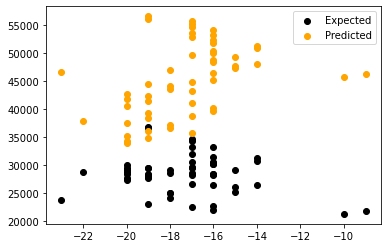

In [8]:
mrr_x_plot = idn_data[['mobility_retail_and_recreation']].values
u_expected = plt.scatter(mrr_x_plot, y_unknown_expected,  color='black')
u_predicted = plt.scatter(mrr_x_plot, y_pred, color='orange')

plt.legend([u_expected, u_predicted], ['Expected', 'Predicted'])

plt.show()

In [9]:
X_test_7d = pd.DataFrame(data=dlcc_7days.get_X_test(), columns=["dlcc_7days", "mrr"])

In [10]:
x_plot = X_test_7d["mrr"].values
y_test_plot = dlcc_7days.get_y_test()
y_pred_plot = dlcc_7days.get_y_pred()

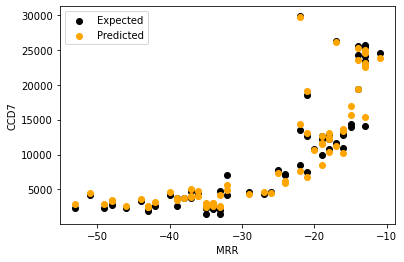

In [24]:
t_expected = plt.scatter(x_plot, y_test_plot,  color='black')
t_predicted = plt.scatter(x_plot, y_pred_plot, color='orange')

plt.legend([t_expected, t_predicted], ['Expected', 'Predicted'])
plt.xlabel('MRR')
plt.ylabel('CCD7')

plt.show()

In [12]:
#dlcc_7days_tstplt = dlcc_7days_con.plot.scatter(x='mrr', y='test_dlcc', color='black', label='Actual Value')
#dlcc_7days_con.plot.scatter(x='mrr', y='pred_dlcc', color='blue', label='Predicted', ax=dlcc_7days_tstplt)

In [14]:
dlcc_7days.r2_score()

0.9915045652883007

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
import math

In [19]:
math.sqrt(mean_squared_error(y_unknown_expected, y_pred))

17808.973034880324

In [20]:
dlcc_7days.rmse()

717.3939325271722

In [22]:
dlcc_7days.get_model().intercept_

2895.4031006300847

In [23]:
dlcc_7days.get_model().coef_

array([ 0.1074089 , 16.66604051])